#**Case Study on Regression**

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?

Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.


###**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**Read Data**

In [2]:
data=pd.read_csv("/content/car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


###**Exploratory Data Analysis**

In [3]:
# to check for null values, datatypes, number of columns and rows

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


There are no missing or categorical variables. There is no need to handle missing values or encode them.

In [4]:
# to get the basic statistical summary of the data

data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


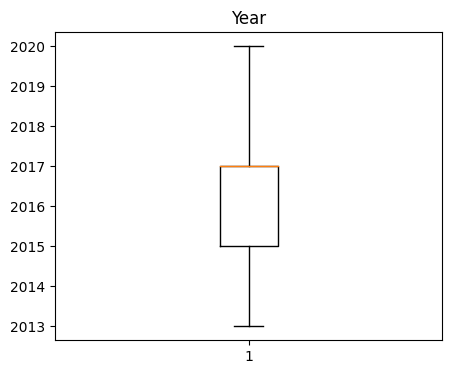

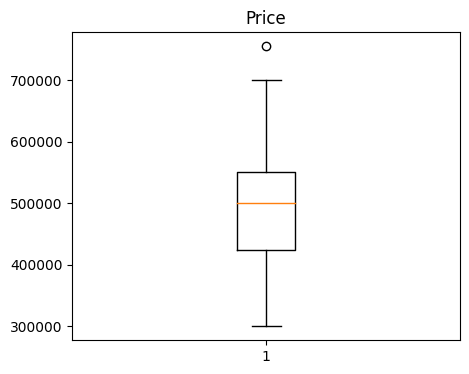

In [5]:
# Check for outliers with the help of boxplot

for i in data.columns:
  plt.figure(figsize=(5,4))
  plt.boxplot(data[i])
  plt.title(i)

###**Handling Outliers**

In [6]:

Q3 = np.percentile(data['Price'], 75, method="midpoint")
Q1 = np.percentile(data['Price'], 25, method="midpoint")

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = []
for x in data['Price']:
  if ((x >upper)):
    outliers.append(x)

print(outliers)

data['Price']=data['Price'].clip(upper=upper)

[755000]


In [7]:
# check if outliers are fixed

outliers = []
for x in data['Price']:
  if ((x >upper)):
    outliers.append(x)

print(outliers)

[]


In [8]:
# Again check for summary stat to analyse the diffence after oulier handling

data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483743.276786
std,1.629616,90857.792803
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,741250.000000


###**Correlation**

In [9]:
data.corr()

,Year,Price
Year,1.000000,0.777425
Price,0.777425,1.000000


<Axes: >

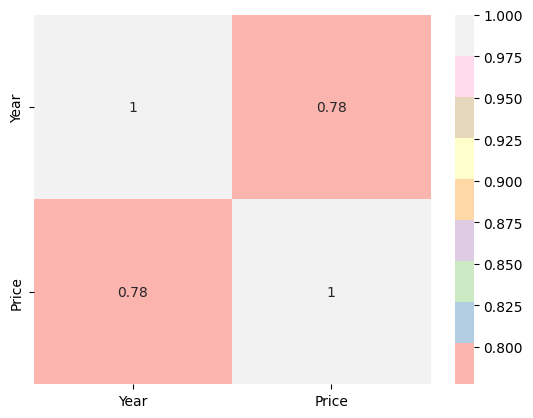

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='Pastel1')

In [11]:
# Split the variables to target variables(y) and independent(feature) variables(x).

y=data['Price']
X=data.drop(['Price'],axis=True)

###**Linear Regression**

In [12]:
# import train_test_split from the sklearn library
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [13]:
# import linear_model from the sklearn library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [14]:
lin_model = lin_reg.fit(X_train,y_train)

In [15]:
lin_pred = lin_model.predict(X_test)

In [16]:
# To check the accuracy of the model

from sklearn.metrics import r2_score
lin_r2=r2_score(y_test,lin_pred)

from sklearn.metrics import mean_squared_error
lin_MSE=mean_squared_error(y_test,lin_pred)

print("Mean Squred Error is:",lin_MSE )
print('\n' "R2 Score is:",lin_r2)

Mean Squred Error is: 4300553427.461349

R2 Score is: 0.3714447800389419


###**Lasso Regression**

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso_reg=Lasso(alpha=0.1)

In [19]:
lasso_model = lasso_reg.fit(X_train,y_train)

In [20]:
lasso_pred=lasso_model.predict(X_test)

In [21]:
#To check the accuracy of the model
laso_r2=r2_score(y_test,lasso_pred)
laso_MSE=mean_squared_error(y_test,lasso_pred)

print("Mean Squred Error is:",laso_MSE )
print('\n' "R2 Score is:",laso_r2)

Mean Squred Error is: 4300548830.135173

R2 Score is: 0.3714454519695234


**Compare lasso and linear regression**

In [22]:
# comparison based on r2 score

print("R2 score for lasso regression is :",laso_r2)
print('\n' "R2 Score for linear regression is :",lin_r2)

R2 score for lasso regression is : 0.3714454519695234

R2 Score for linear regression is : 0.3714447800389419


The R2 score for lasso regression is large as compared to linear. So Lasso regression model is performing better.

Becaue the R2 score closer to one is the best model.

In [23]:
#comparison based on MSE
print("Mean Squred Error for lasso regression is:",laso_MSE )
print("Mean Squred Error for linear regression is:",lin_MSE )

Mean Squred Error for lasso regression is: 4300548830.135173
Mean Squred Error for linear regression is: 4300553427.461349


The MSE  value for lasso regression is lower,so lasso regression is performing better.

The model with MSE closer to zero is better.

###**Price prediction for 2022 model**

In [24]:
year=[[2022]]

In [25]:
linear_reg_price_2022 = lin_reg.predict(year)
lasso_reg_price_2022 = lasso_reg.predict(year)


print("Predicted price of a 2022 model using Linear Regression:", linear_reg_price_2022[0])
print("Predicted price of a 2022 model using Lasso Regression:", lasso_reg_price_2022[0]);


Predicted price of a 2022 model using Linear Regression: 742602.7087843567
Predicted price of a 2022 model using Lasso Regression: 742602.4846169949


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


###**Learnings on Lasso Regression**


*  Lasso regression, short for Least Absolute Shrinkage and Selection
Operator, is a regularization technique used in linear regression to prevent overfitting and feature selection. Unlike linear regression, which minimizes the sum of squared residuals, lasso regression adds a penalty term that constrains the absolute size of the coefficients.



* In lasso regression, the objective function to minimize is the sum of squared residuals plus the sum of the absolute values of the coefficients multiplied by a tuning parameter (alpha) which controls the strength of regularization. This penalty encourages sparse solutions by driving some coefficients to zero, effectively performing feature selection.

* Lasso regression is particularly useful when dealing with high-dimensional datasets with many features, as it can automatically select the most relevant features while shrinking the coefficients of less important ones. It provides a balance between bias and variance, helping to improve model interpretability and generalization performance.


Overall, Lasso regression is a powerful technique for linear regression tasks, especially when dealing with datasets with a large number of features or when feature selection is desired. It strikes a balance between model simplicity, predictive accuracy, and interpretability.


